<h2>Histogram<h2>

In [1]:
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt

In [2]:
db_con = sqlite3.connect('checking-logs.sqlite.sqlite')

<h3>analyze only the users and not the admins<h3>

In [4]:
sql_query = """
SELECT
    timestamp as datetime
FROM 
    checker
WHERE
    uid LIKE 'user_%'
"""

db = pd.io.sql.read_sql(sql=sql_query, con=db_con, parse_dates=['datetime'])

db['daytype'] = db['datetime'].dt.dayofweek.apply(lambda x: 'weekend' if x > 4 else 'working_day')
db['hour'] = db['datetime'].dt.hour
db

,datetime,daytype,hour
0,2020-04-17 05:19:02.744528,working_day,5
1,2020-04-17 05:22:35.249331,working_day,5
2,2020-04-17 05:22:45.549397,working_day,5
3,2020-04-17 05:34:14.691200,working_day,5
4,2020-04-17 05:34:24.422370,working_day,5
...,...,...,...
3202,2020-05-21 20:19:06.872761,working_day,20
3203,2020-05-21 20:22:41.785725,working_day,20
3204,2020-05-21 20:22:41.877806,working_day,20
3205,2020-05-21 20:37:00.129678,working_day,20


<h3>create a graph<h3>

[]

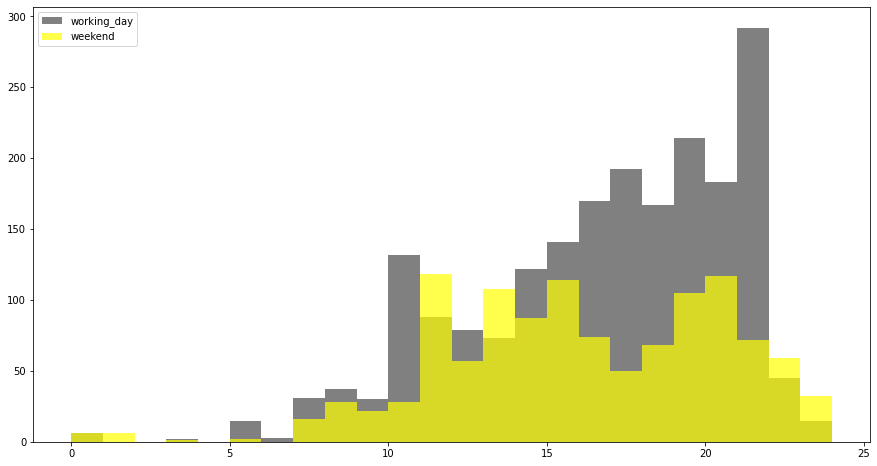

In [5]:
first_list = db[db['daytype'] == 'working_day']['hour'].tolist()
second_list = db[db['daytype'] == 'weekend']['hour'].tolist()
plt.figure(figsize=(15,8))
plt.hist(x=first_list,
         bins=range(0, 25),
         range=[0, 24],
         color='grey'
        )
plt.hist(x=second_list,
         bins=range(0, 25),
         range=[0, 24],
         alpha=0.7,
         color='yellow'
        )
plt.legend(['working_day', 'weekend'])
plt.plot()

<h3>close the connection to the database<h3>

In [6]:
db_con.close()

<h3>Are there hours when the total number of commits was higher on weekends than on working days?<h3>

<h3>The answer is 11, 13, 22 and 23 hour.<h3>